# Not your grandmother’s toolbox– the Robotics Toolbox reinvented for python
### Peter Corke and Jesse Haviland

This is the code for the examples in the paper published at ICRA2021.


In [1]:
from math import pi
import numpy as np

# display result of assignments
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
# make NumPy display a bit nicer
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:10.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})
# make cells nice and wide
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
%matplotlib notebook

# III.SPATIAL MATHEMATICS

In [2]:
from spatialmath.base import *
T = transl(0.5, 0.0, 0.0) @ rpy2tr(0.1, 0.2, 0.3, order='xyz') @ trotx(-90, 'deg')

array([[    0.9752,    -0.1987,   -0.09784,        0.5],
       [    0.1538,     0.2896,     0.9447,        0],
       [   -0.1593,    -0.9363,      0.313,        0],
       [       0,        0,        0,          1]])

In [3]:
from spatialmath import *
T = SE3(0.5, 0.0, 0.0) * SE3.RPY([0.1, 0.2, 0.3], order='xyz') * SE3.Rx(-90, unit='deg')

   0.9752   -0.1987   -0.09784   0.5       
   0.1538    0.2896    0.9447    0         
  -0.1593   -0.9363    0.313     0         
   0         0         0         1         


In [4]:
T.eul()

array([     1.674,      1.252,     -1.402])

In [5]:
T.R

array([[    0.9752,    -0.1987,   -0.09784],
       [    0.1538,     0.2896,     0.9447],
       [   -0.1593,    -0.9363,      0.313]])

<IPython.core.display.Javascript object>


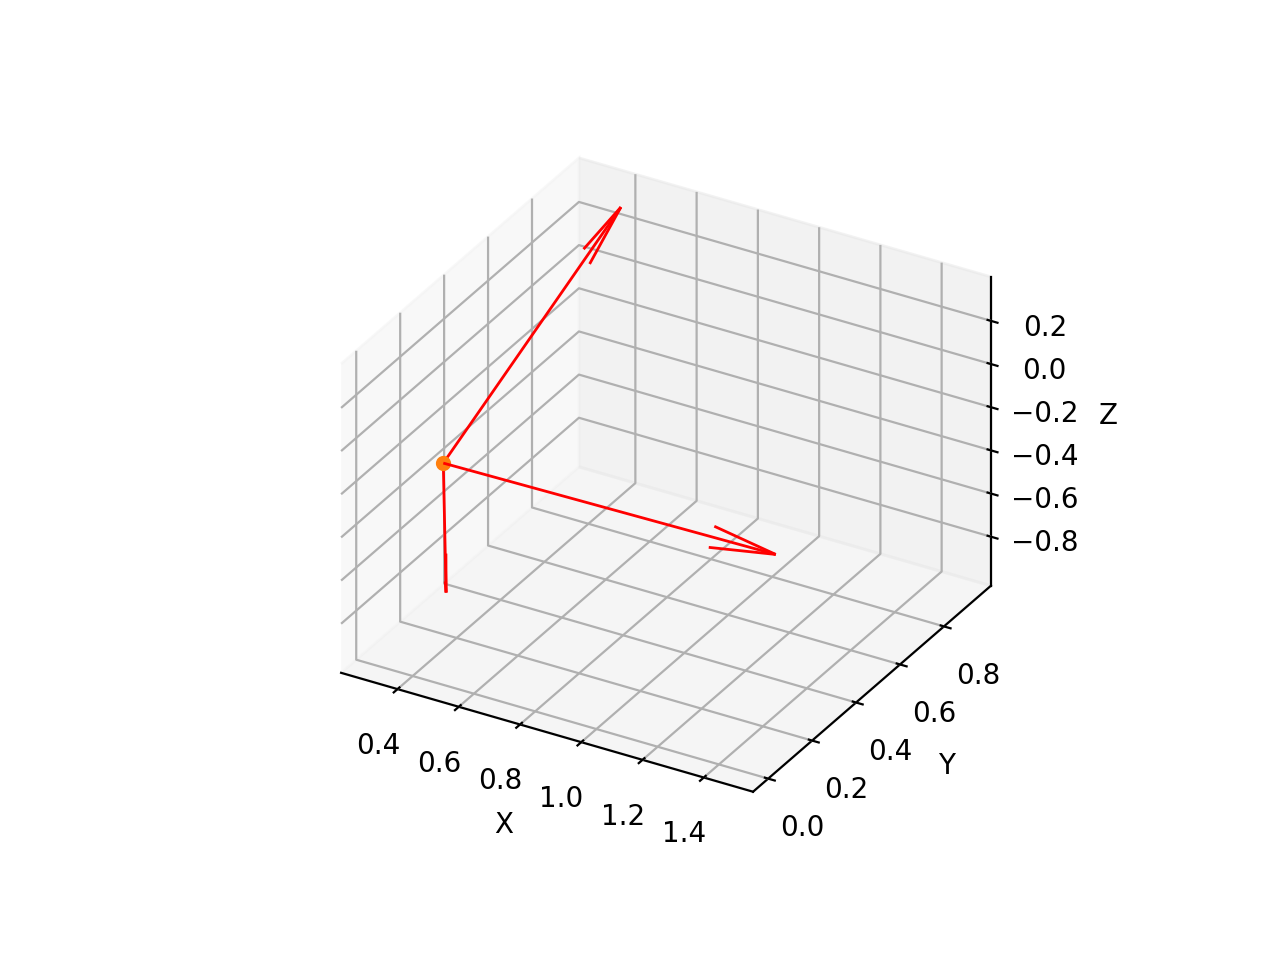

In [6]:
T.plot(color='red', label='2')

In [7]:
UnitQuaternion.Rx(0.3)
UnitQuaternion.AngVec(0.3, [1, 0, 0])

 0.9888 <<  0.1494,  0.0000,  0.0000 >>


In [8]:
R = SE3.Rx(np.linspace(0, pi/2, num=100))
len(R)

100

# IV. ROBOTICS TOOLBOX
## A. Robot models

In [9]:
from roboticstoolbox import *
# robot length values (metres)
d1 = 0.352
a1 = 0.070
a2 = 0.360
d4 = 0.380
d6 = 0.065;

In [10]:
robot = DHRobot([
  RevoluteDH(d=d1, a=a1, alpha=-pi/2), 
  RevoluteDH(a=a2), 
  RevoluteDH(alpha=pi/2),
  ], name="my IRB140")

DHRobot: my IRB140, 3 joints (RRR), dynamics, standard DH parameters
┏━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃  aⱼ  ┃   ⍺ⱼ   ┃
┣━━━━╋━━━━━━━╋━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.352 ┃ 0.07 ┃ -90.0° ┃
┃ q2 ┃     0 ┃ 0.36 ┃   0.0° ┃
┃ q3 ┃     0 ┃    0 ┃  90.0° ┃
┗━━━━┻━━━━━━━┻━━━━━━┻━━━━━━━━┛

In [11]:
puma = models.DH.Puma560()

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┏━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ   ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃      0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃   0.15 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃ 0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃      0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃      0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴──────┴───────┴─────┴───

In [12]:
T = puma.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

   0.1217   -0.6067   -0.7856    0.2478    
   0.8184    0.5092   -0.2665   -0.1259    
   0.5617   -0.6105    0.5584    1.146     
   0         0         0         1         


In [13]:
sol = puma.ikine_LM(T)

IKsolution(q=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), success=True, reason=None, iterations=12, residual=8.515092622288915e-13)

<IPython.core.display.Javascript object>


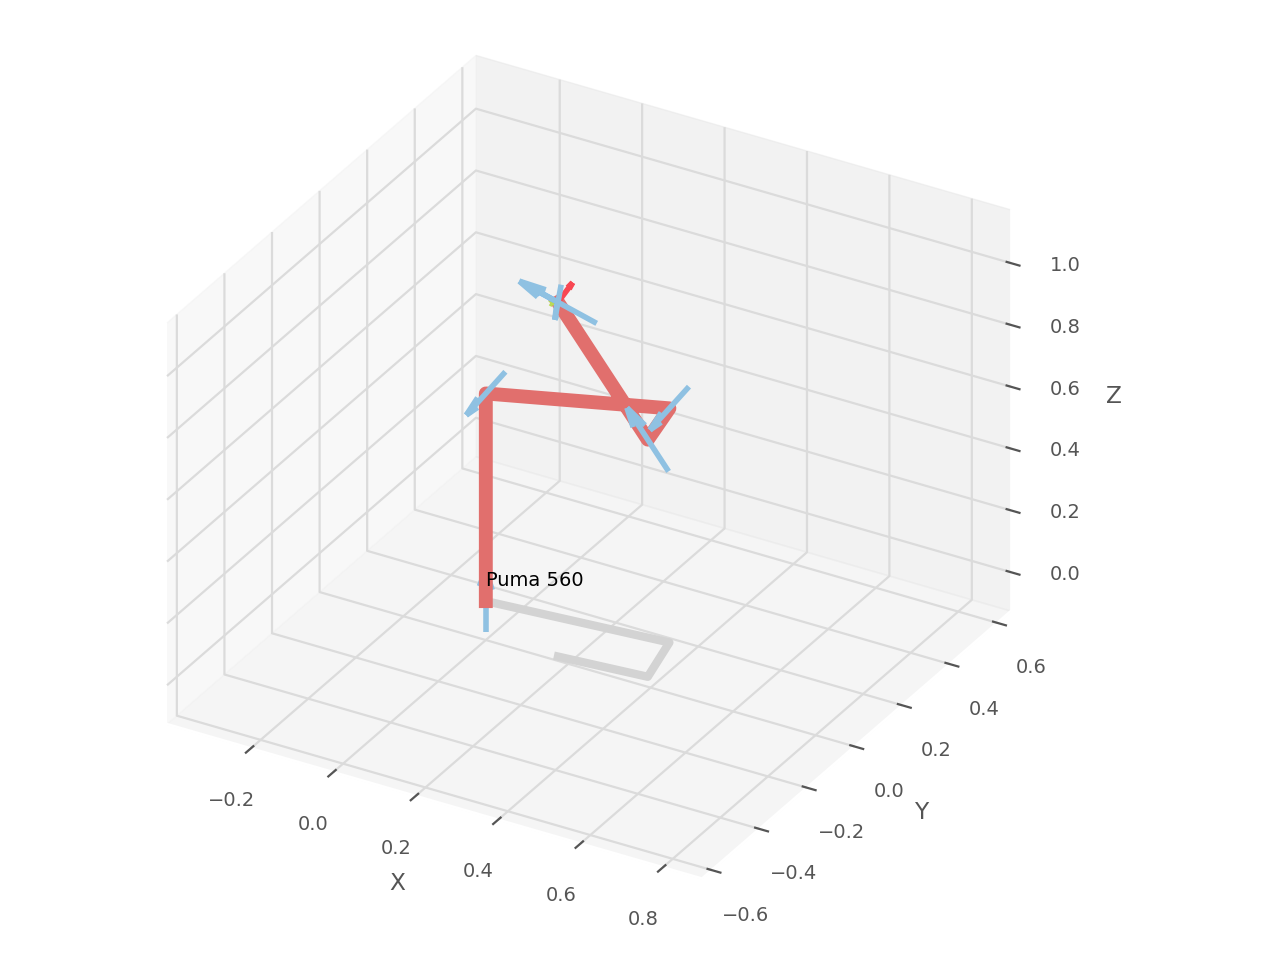

In [14]:
puma.plot(sol.q);

In [15]:
puma.ikine_a(T, config="lun")

IKsolution(q=array([ 2.10117673,  1.11634865,  0.3       ,  0.9527867 , -1.65052534, -0.9859752 ]), success=True, reason='')

In [16]:
from roboticstoolbox import ETS as ET

In [17]:
# Puma dimensions (m), see RVC2 Fig. 7.4 for details
l1 = 0.672
l2 = -0.2337
l3 = 0.4318
l4 = 0.0203
l5 = 0.0837
l6 = 0.4318;

In [18]:
e = ET.tz(l1) * ET.rz() * ET.ty(l2) * ET.ry() \
    * ET.tz(l3) * ET.tx(l4) * ET.ty(l5) * ET.ry() \
    * ET.tz(l6) * ET.rz() * ET.ry() * ET.rz()

tz(0.672) ⊕ Rz(q0) ⊕ ty(-0.2337) ⊕ Ry(q1) ⊕ tz(0.4318) ⊕ tx(0.0203) ⊕ ty(0.0837) ⊕ Ry(q2) ⊕ tz(0.4318) ⊕ Rz(q3) ⊕ Ry(q4) ⊕ Rz(q5)

In [19]:
robot = ERobot(e)
print(robot)

ERobot: noname, 6 joints (RRRRRR)
┌───┬────────┬───────┬────────┬───────────────────────────────────────────────────────────────────┐
│id │  link  │ joint │ parent │                                ETS                                │
├───┼────────┼───────┼────────┼───────────────────────────────────────────────────────────────────┤
│ 1 │ link0  │     0 │ BASE   │ {link0} = {BASE} ⊕ tz(0.672) ⊕ Rz(q0)                             │
│ 2 │ link1  │     1 │ link0  │ {link1} = {link0} ⊕ ty(-0.2337) ⊕ Ry(q1)                          │
│ 3 │ link2  │     2 │ link1  │ {link2} = {link1} ⊕ tz(0.4318) ⊕ tx(0.0203) ⊕ ty(0.0837) ⊕ Ry(q2) │
│ 4 │ link3  │     3 │ link2  │ {link3} = {link2} ⊕ tz(0.4318) ⊕ Rz(q3)                           │
│ 5 │ link4  │     4 │ link3  │ {link4} = {link3} ⊕ Ry(q4)                                        │
│ 6 │ @link5 │     5 │ link4  │ {link5} = {link4} ⊕ Rz(q5)                                        │
└───┴────────┴───────┴────────┴───────────────────────────────────

In [20]:
panda = models.URDF.Panda()
print(panda)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), geometry, collision
┌───┬──────────────┬───────┬─────────────┬─────────────────────────────────────────────────────────────────────────────┐
│id │     link     │ joint │   parent    │                                     ETS                                     │
├───┼──────────────┼───────┼─────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 1 │ panda_link0  │       │ BASE        │ {panda_link0} = {BASE}                                                      │
│ 2 │ panda_link1  │     0 │ panda_link0 │ {panda_link1} = {panda_link0} ⊕ tz(0.333) ⊕ Rz(q0)                          │
│ 3 │ panda_link2  │     1 │ panda_link1 │ {panda_link2} = {panda_link1} ⊕ Rx(-90°) ⊕ Rz(q1)                           │
│ 4 │ panda_link3  │     2 │ panda_link2 │ {panda_link3} = {panda_link2} ⊕ ty(-0.316) ⊕ Rx(90°) ⊕ Rz(q2)               │
│ 5 │ panda_link4  │     3 │ panda_link3 │ {panda_link4} = {panda_link3} ⊕ tx(0.

## B. Trajectories

<IPython.core.display.Javascript object>


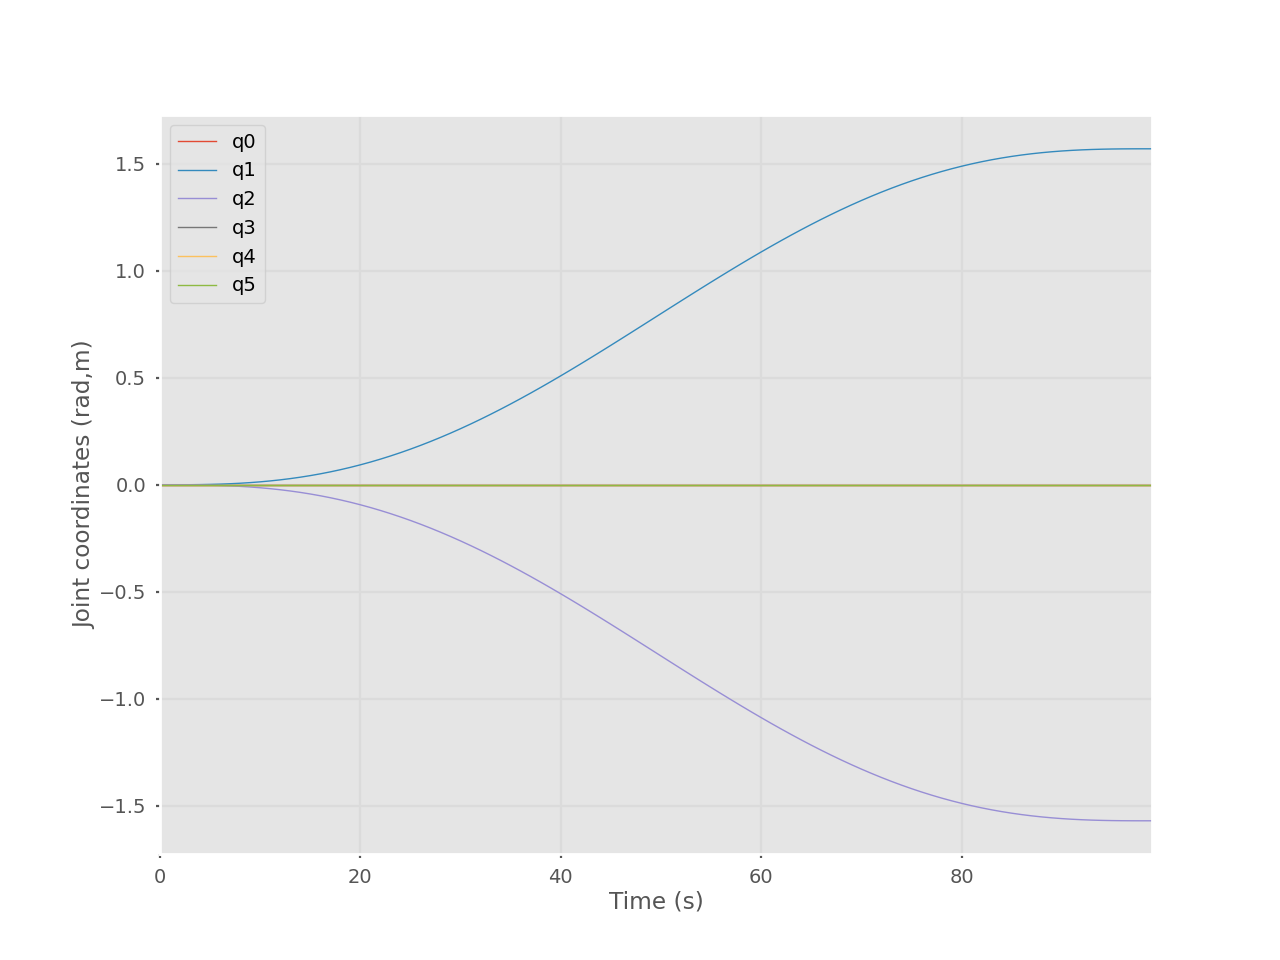

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [25]:
traj = jtraj(puma.qz, puma.qr, 100)
qplot(traj.q)

In [26]:
t = np.arange(0, 2, 0.010)
T0 = SE3(0.6, -0.5, 0.3)

   1         0         0         0.6       
   0         1         0        -0.5       
   0         0         1         0.3       
   0         0         0         1         


In [27]:
T1 = SE3(0.4, 0.5, 0.2)

   1         0         0         0.4       
   0         1         0         0.5       
   0         0         1         0.2       
   0         0         0         1         


In [28]:
Ts = ctraj(T0, T1, t)
len(Ts)

200

In [29]:
sol = puma.ikine_LM(Ts)
sol.q.shape

(200, 6)

## C. Symbolic manipulation

In [30]:
import spatialmath.base.symbolic as sym
phi, theta, psi = sym.symbol('φ, ϴ, ψ')
rpy2r(phi, theta, psi)

array([[cos(ψ)*cos(ϴ), sin(φ)*sin(ϴ)*cos(ψ) - sin(ψ)*cos(φ), sin(φ)*sin(ψ) + sin(ϴ)*cos(φ)*cos(ψ)],
       [sin(ψ)*cos(ϴ), sin(φ)*sin(ψ)*sin(ϴ) + cos(φ)*cos(ψ), -sin(φ)*cos(ψ) + sin(ψ)*sin(ϴ)*cos(φ)],
       [-sin(ϴ), sin(φ)*cos(ϴ), cos(φ)*cos(ϴ)]], dtype=object)

In [31]:
q = sym.symbol("q_:6") # q = (q_1, q_2, ... q_5)
T = puma.fkine(q);

In [32]:
puma = models.DH.Puma560(symbolic=True)
T = puma.fkine(q)
T.t[0]

0.15005*sin(q_0) - 0.0203*sin(q_1)*sin(q_2)*cos(q_0) - 0.4318*sin(q_1)*cos(q_0)*cos(q_2) - 0.4318*sin(q_2)*cos(q_0)*cos(q_1) + 0.0203*cos(q_0)*cos(q_1)*cos(q_2) + 0.4318*cos(q_0)*cos(q_1)

In [33]:
puma = models.DH.Puma560(symbolic=False)
J = puma.jacob0(puma.qn)

array([[ 1.50050000e-01,  1.43542677e-02,  3.19682976e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.96303149e-01,  3.65130371e-17,  1.78170459e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.28447268e-18,  5.96303149e-01,  2.90974440e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.52180785e-17,  0.00000000e+00,  0.00000000e+00,  7.07106781e-01,  0.00000000e+00,  1.00000000e+00],
       [ 6.86402876e-33, -1.00000000e+00, -1.00000000e+00, -1.04530143e-16, -1.00000000e+00, -6.12323400e-17],
       [ 1.00000000e+00,  6.12323400e-17,  6.12323400e-17, -7.07106781e-01,  6.12323400e-17, -3.13396163e-16]])

In [34]:
J = puma.jacobe(puma.qn)

array([[-7.82536587e-17, -5.96303149e-01, -2.90974440e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.96303149e-01,  8.78945397e-19,  1.95749367e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.50050000e-01,  1.43542677e-02,  3.19682976e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  3.01573569e-33,  3.01573569e-33,  7.07106781e-01,  0.00000000e+00,  0.00000000e+00],
       [-6.12323400e-17, -1.00000000e+00, -1.00000000e+00, -1.79345371e-17, -1.00000000e+00,  0.00000000e+00],
       [-3.13396163e-16,  6.12323400e-17,  6.12323400e-17,  7.07106781e-01,  6.12323400e-17,  1.00000000e+00]])

## D. Differential kinematics

In [35]:
J = puma.jacob0(puma.qr)

array([[ 1.5005000e-01, -8.6360000e-01, -4.3180000e-01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.0300000e-02,  1.2430165e-18,  1.2430165e-18,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.0300000e-02,  2.0300000e-02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17,  6.1232340e-17,  1.0000000e+00,  6.1232340e-17,  1.0000000e+00]])

In [36]:
np.linalg.matrix_rank(J)

5

In [37]:
jsingu(J)

joint 5 is dependent on joint 3


In [38]:
H = panda.hessian0(panda.qz)
H.shape

(6, 7, 7)

In [39]:
puma.manipulability(puma.qn)

0.07861716534599998

In [40]:
puma.manipulability(puma.qn, method="asada")

0.0043746137281665

In [41]:
puma.manipulability(puma.qn, axes="trans")

0.11118146146764128

In [42]:
panda.jacobm(panda.qr)

array([[-1.23259516e-32],
       [-2.62678438e-03],
       [-1.48554870e-17],
       [ 4.06398364e-02],
       [ 4.44870139e-18],
       [-2.73383661e-02],
       [-5.54667824e-32]])

## E. Dynamics

In [43]:
tau = puma.rne(puma.qn, np.zeros((6,)), np.zeros((6,)))

array([-1.61532977e-15,  3.16398804e+01,  6.03513802e+00,  8.34761258e-18,  2.82528000e-02,  0.00000000e+00])

In [44]:
J = puma.inertia(puma.qn)

array([[ 3.65937541e+00, -4.04361246e-01,  1.00613648e-01, -2.51695583e-03,  2.79129133e-19, -1.11022302e-20],
       [-4.04361246e-01,  4.41374193e+00,  3.50890665e-01,  5.95529431e-19,  2.35951307e-03,  2.44929360e-21],
       [ 1.00613648e-01,  3.50890665e-01,  9.37841575e-01,  5.41684976e-19,  1.48016639e-03,  2.44929360e-21],
       [-2.51695583e-03,  5.95529431e-19,  5.41684976e-19,  1.92531706e-01,  2.62380953e-20,  2.82842712e-05],
       [ 2.52898724e-19,  2.35951307e-03,  1.48016639e-03,  2.62380953e-20,  1.71348452e-01,  2.44929360e-21],
       [-1.01643954e-20,  2.44929360e-21,  2.44929360e-21,  2.82842712e-05,  2.44929360e-21,  1.94104506e-01]])

In [45]:
C = puma.coriolis(puma.qn, 0.1 * np.ones((6,)))

array([[-2.66969622e-02, -1.29059829e-01,  1.69557253e-02, -3.34419803e-05, -2.78929620e-04,  6.00000000e-06],
       [ 6.27416462e-02,  3.85714300e-02,  7.71469941e-02, -1.55223544e-04, -1.24020873e-05, -5.85786438e-07],
       [-3.60731378e-02, -3.86676328e-02, -9.20686970e-05, -9.30443443e-05, -2.76206091e-04, -5.85786438e-07],
       [ 4.00101338e-05,  5.71808764e-05, -4.99832360e-06,  1.01080000e-05,  2.42501356e-05, -4.24264069e-06],
       [-1.75563492e-05,  9.62027261e-05,  1.84137394e-04, -2.42501356e-05, -1.35525272e-21, -5.85786438e-07],
       [ 6.00000000e-06,  3.41421356e-06,  3.41421356e-06,  1.41421356e-06,  5.85786438e-07,  0.00000000e+00]])

In [46]:
g = puma.gravload(puma.qn)

array([-1.61532977e-15,  3.16398804e+01,  6.03513802e+00,  8.34761258e-18,  2.82528000e-02,  0.00000000e+00])

In [47]:
qdd = puma.accel(puma.qn, tau, np.zeros((6,)))

array([ 1.47558948e+02, -1.33667778e+02,  4.06355199e+02, -2.49417795e+00, -8.28105260e+00,  3.63443421e-04])

# V. NEW CAPABILITY
## B. Collision checking

In [48]:
from spatialgeometry import Box
obstacle = Box([1, 1, 1], base=SE3(1, 0, 0)) 
iscollision = panda.collided(panda.qr, obstacle) # boolean
iscollision = panda.links[0].collided(obstacle)

False

In [49]:
d, p1, p2 = panda.closest_point(panda.qr, obstacle)
print(d, p1, p2)
d, p1, p2 = panda.links[0].closest_point(obstacle)
print(d, p1, p2)

0.015720599440705682 [ 0.49052377 -0.05996266  0.51203177  1.        ] [ 0.50037345 -0.05996266  0.49977938  1.        ]
0.5 [ 5.55111512e-17 -2.96851076e-18  6.00000000e-02  1.00000000e+00] [ 5.00000000e-01 -2.77061004e-17  6.00000000e-02  1.00000000e+00]


## C. Interfaces

In [50]:
panda.plot(panda.qr, block=False);

/Users/corkep/Dropbox/code/swift/swift/out


In [ ]:
from roboticstoolbox.backends.swift import Swift
backend = Swift()
backend.launch()   # create graphical world
backend.add(panda) # add robot to the world
panda.q = panda.qr        # update the robot
backend.step()    # display the world